In [1]:
import requests  # To call the API
import pandas as pd  # To work with tables (dataframes)


In [2]:
def load_who_data(api_url):
    response = requests.get(api_url)         # Step 1: Call the API
    data = response.json()['value']          # Step 2: Extract the actual records from the 'value' key
    df = pd.DataFrame(data)                  # Step 3: Convert to DataFrame
    return df


In [3]:
# Load datasets
adult_obesity = load_who_data("https://ghoapi.azureedge.net/api/NCD_BMI_30C")
child_obesity = load_who_data("https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C")
adult_malnutrition = load_who_data("https://ghoapi.azureedge.net/api/NCD_BMI_18C")
child_malnutrition = load_who_data("https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C")


In [4]:
adult_obesity["age_group"] = "Adult"
child_obesity["age_group"] = "Child/Adolescent"
adult_malnutrition["age_group"] = "Adult"
child_malnutrition["age_group"] = "Child/Adolescent"


In [5]:
# Combine datasets
df_obesity = pd.concat([adult_obesity, child_obesity], ignore_index=True)
df_malnutrition = pd.concat([adult_malnutrition, child_malnutrition], ignore_index=True)


In [6]:
df_obesity = df_obesity[df_obesity["TimeDim"].between(2012, 2022)]
df_malnutrition = df_malnutrition[df_malnutrition["TimeDim"].between(2012, 2022)]


In [7]:
df_obesity.head()
df_malnutrition.head()


,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
9,1829154,NCD_BMI_18C,COUNTRY,ETH,YEAR,AFR,Africa,SEX,2018,SEX_FMLE,...,21.9 [18.8-25.0],21.87664,18.81258,25.04917,None,2024-02-29T16:06:41.017+01:00,2018,2018-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,Adult
12,1830126,NCD_BMI_18C,COUNTRY,NZL,YEAR,WPR,Western Pacific,SEX,2013,SEX_MLE,...,0.8 [0.6-1.0],0.76718,0.60271,0.95585,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00,Adult
13,53,NCD_BMI_18C,COUNTRY,GAB,YEAR,AFR,Africa,SEX,2021,SEX_FMLE,...,5.8 [4.0-8.1],5.79511,3.97204,8.07702,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,Adult
17,2202,NCD_BMI_18C,COUNTRY,MNG,YEAR,WPR,Western Pacific,SEX,2017,SEX_BTSX,...,3.1 [2.4-3.8],3.09065,2.42823,3.84215,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,Adult
18,2505,NCD_BMI_18C,COUNTRY,SLE,YEAR,AFR,Africa,SEX,2016,SEX_FMLE,...,8.4 [6.7-10.3],8.37172,6.65567,10.25312,None,2024-02-29T16:06:41.017+01:00,2016,2016-01-01T00:00:00+01:00,2016-12-31T00:00:00+01:00,Adult


In [40]:
import requests
import pandas as pd


In [45]:

# Step 1: Get all WHO indicators
response = requests.get("https://ghoapi.azureedge.net/api/Indicator")
data = response.json()

# Step 2: Extract relevant indicators
indicators = data['value']

# Step 3: Convert to DataFrame
df_indicators = pd.DataFrame(indicators)

# Step 4: Filter for relevant health indicators
keywords = ['obesity', 'malnutrition', 'undernourishment', 'BMI', 'nutrition']
filtered_df = df_indicators[df_indicators['IndicatorName'].str.contains('|'.join(keywords), case=False, na=False)]


print("Matching Indicators:")
print(filtered_df[['IndicatorCode', 'IndicatorName']].head(10))  # Top 10


Matching Indicators:
          IndicatorCode                                      IndicatorName
22   EQ_OVERWEIGHTADULT               Prevalence of overweight and obesity
358         NCD_BMI_18C  Prevalence of underweight among adults, BMI < ...
359         NCD_BMI_25C  Prevalence of overweight among adults, BMI &Gr...
360         NCD_BMI_30A  Prevalence of obesity among adults, BMI &Great...
368      NCD_BMI_PLUS1C  Prevalence of overweight among children and ad...
413        NCD_BMI_MEAN       Mean BMI (kg/m²) (age-standardized estimate)
419       NCD_BMI_MEANC             Mean BMI (kg/m&#xb2;) (crude estimate)
420      NCD_BMI_PLUS1A  Prevalence of overweight among children and ad...
421      NCD_BMI_PLUS2C  Prevalence of obesity among children and adole...
453         NCD_BMI_25A  Prevalence of overweight among adults, BMI &Gr...


In [46]:
import requests
import pandas as pd

# Step 1: Choose your indicator code
indicator_code = "NCD_BMI_30A"

# Step 2: Build API URL for the chosen indicator
url = f"https://ghoapi.azureedge.net/api/{indicator_code}"

# Step 3: Request data from WHO
response = requests.get(url)
data = response.json()

# Step 4: Convert to DataFrame
df_obesity = pd.DataFrame(data['value'])

# Step 5: Show some results
print("📊 Obesity Data Sample:")
print(df_obesity[['SpatialDim', 'TimeDim', 'Value']].head())


📊 Obesity Data Sample:
  SpatialDim  TimeDim             Value
0        KNA     2014  48.0 [39.7-56.3]
1        LKA     2012     7.9 [6.9-8.9]
2        SRB     2022  25.5 [19.8-31.8]
3        SUR     1996  19.1 [12.4-26.7]
4     WB_UMI     1999     7.2 [7.0-7.3]


In [47]:
# Remove any text after space (e.g., "48.0 [39.7-56.3]" → "48.0")
df_obesity['Cleaned_Value'] = df_obesity['Value'].str.extract(r'(^[\d.]+)').astype(float)

# View cleaned data
df_obesity[['SpatialDim', 'TimeDim', 'Cleaned_Value']].head()


,SpatialDim,TimeDim,Cleaned_Value
0,KNA,2014,48.0
1,LKA,2012,7.9
2,SRB,2022,25.5
3,SUR,1996,19.1
4,WB_UMI,1999,7.2


In [48]:
# Choose countries
selected_countries = ['IND', 'USA', 'LKA', 'GBR', 'KEN']

# Filter the data
df_filtered = df_obesity[df_obesity['SpatialDim'].isin(selected_countries)]

# Preview the filtered data
df_filtered.head()


,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Cleaned_Value
1,1826867,NCD_BMI_30A,COUNTRY,LKA,YEAR,SEAR,South-East Asia,SEX,2012,SEX_FMLE,...,7.9 [6.9-8.9],7.86021,6.91229,8.86490,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00,7.9
15,2246,NCD_BMI_30A,COUNTRY,KEN,YEAR,AFR,Africa,SEX,2000,SEX_MLE,...,2.2 [1.2-3.5],2.17215,1.22961,3.52131,None,2024-02-29T16:06:41.017+01:00,2000,2000-01-01T00:00:00+01:00,2000-12-31T00:00:00+01:00,2.2
34,12119,NCD_BMI_30A,COUNTRY,IND,YEAR,SEAR,South-East Asia,SEX,1996,SEX_FMLE,...,1.9 [1.6-2.1],1.85585,1.61389,2.12484,None,2024-02-29T16:06:41.017+01:00,1996,1996-01-01T00:00:00+01:00,1996-12-31T00:00:00+01:00,1.9
76,29076,NCD_BMI_30A,COUNTRY,USA,YEAR,AMR,Americas,SEX,1999,SEX_BTSX,...,26.6 [25.7-27.5],26.56044,25.66986,27.47296,None,2024-02-29T16:06:41.017+01:00,1999,1999-01-01T00:00:00+01:00,1999-12-31T00:00:00+01:00,26.6
83,30302,NCD_BMI_30A,COUNTRY,USA,YEAR,AMR,Americas,SEX,2010,SEX_BTSX,...,35.8 [34.9-36.7],35.84183,34.92719,36.74815,None,2024-02-29T16:06:41.017+01:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00,35.8


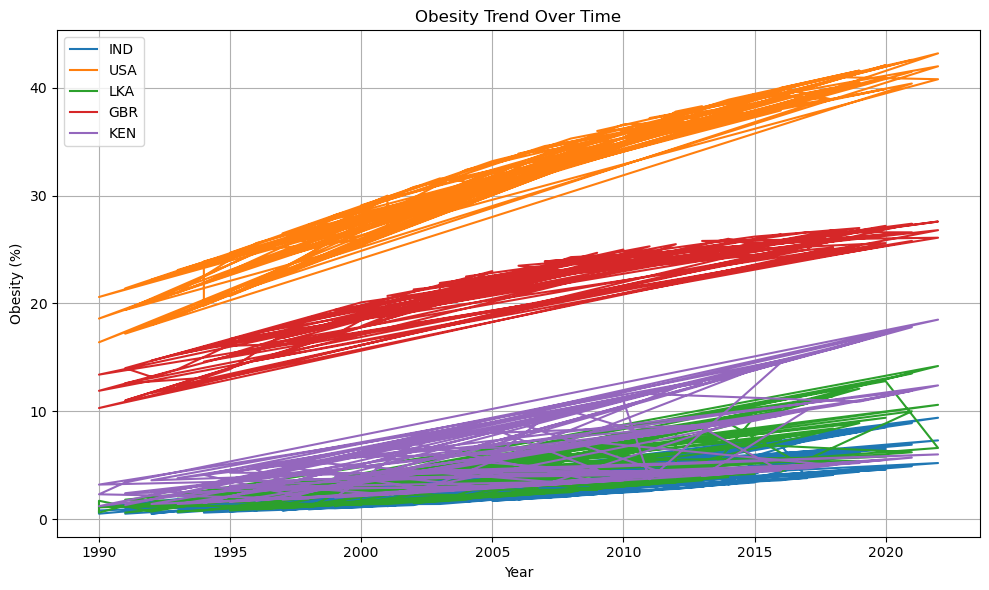

In [49]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each country
for country in selected_countries:
    country_data = df_filtered[df_filtered['SpatialDim'] == country]
    plt.plot(country_data['TimeDim'], country_data['Cleaned_Value'], label=country)

# Add labels and legend
plt.title("Obesity Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Obesity (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
# Fetch undernourishment data from WHO API
url_under = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
response_under = requests.get(url_under)

# Convert to DataFrame
data_under = response_under.json()
df_under = pd.json_normalize(data_under['value'])

# View first few rows
df_under.head()


,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,1826233,NCD_BMI_18C,COUNTRY,MOZ,YEAR,AFR,Africa,SEX,1991,SEX_BTSX,...,None,14.6 [10.9-18.8],14.61381,10.86213,18.76256,None,2024-02-29T16:06:41.017+01:00,1991,1991-01-01T00:00:00+01:00,1991-12-31T00:00:00+01:00
1,1826715,NCD_BMI_18C,COUNTRY,GRC,YEAR,EUR,Europe,SEX,2001,SEX_BTSX,...,None,1.8 [1.3-2.4],1.79256,1.29213,2.37075,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00
2,1826832,NCD_BMI_18C,COUNTRY,SUR,YEAR,AMR,Americas,SEX,1990,SEX_MLE,...,None,13.9 [6.8-22.7],13.90493,6.84062,22.66127,None,2024-02-29T16:06:41.017+01:00,1990,1990-01-01T00:00:00+01:00,1990-12-31T00:00:00+01:00
3,1826950,NCD_BMI_18C,COUNTRY,GRL,YEAR,EUR,Europe,SEX,1990,SEX_MLE,...,None,2.0 [0.8-3.9],2.02220,0.81410,3.91081,None,2024-02-29T16:06:41.017+01:00,1990,1990-01-01T00:00:00+01:00,1990-12-31T00:00:00+01:00
4,1827622,NCD_BMI_18C,COUNTRY,MYS,YEAR,WPR,Western Pacific,SEX,2000,SEX_BTSX,...,None,10.8 [9.5-12.0],10.76494,9.54987,12.04797,None,2024-02-29T16:06:41.017+01:00,2000,2000-01-01T00:00:00+01:00,2000-12-31T00:00:00+01:00


In [52]:
# Keep only relevant columns
df_under = df_under[['SpatialDim', 'TimeDim', 'Value']]

# Clean the Value column to keep only the number
df_under['Cleaned_Value'] = df_under['Value'].str.extract(r'(^[\d.]+)').astype(float)

# Rename for clarity
df_under = df_under.rename(columns={'Cleaned_Value': 'Undernourishment'})


In [53]:
df_under = df_under[df_under['SpatialDim'].isin(selected_countries)]


In [54]:
# Merge on SpatialDim and TimeDim
df_compare = pd.merge(df_filtered, df_under, on=['SpatialDim', 'TimeDim'])

# Keep only relevant columns
df_compare = df_compare[['SpatialDim', 'TimeDim', 'Cleaned_Value', 'Undernourishment']]
df_compare = df_compare.rename(columns={'Cleaned_Value': 'Obesity'})

# Show the combined view
df_compare.head()


,SpatialDim,TimeDim,Obesity,Undernourishment
0,LKA,2012,7.9,18.4
1,LKA,2012,7.9,16.4
2,LKA,2012,7.9,20.6
3,KEN,2000,2.2,14.8
4,KEN,2000,2.2,18.5


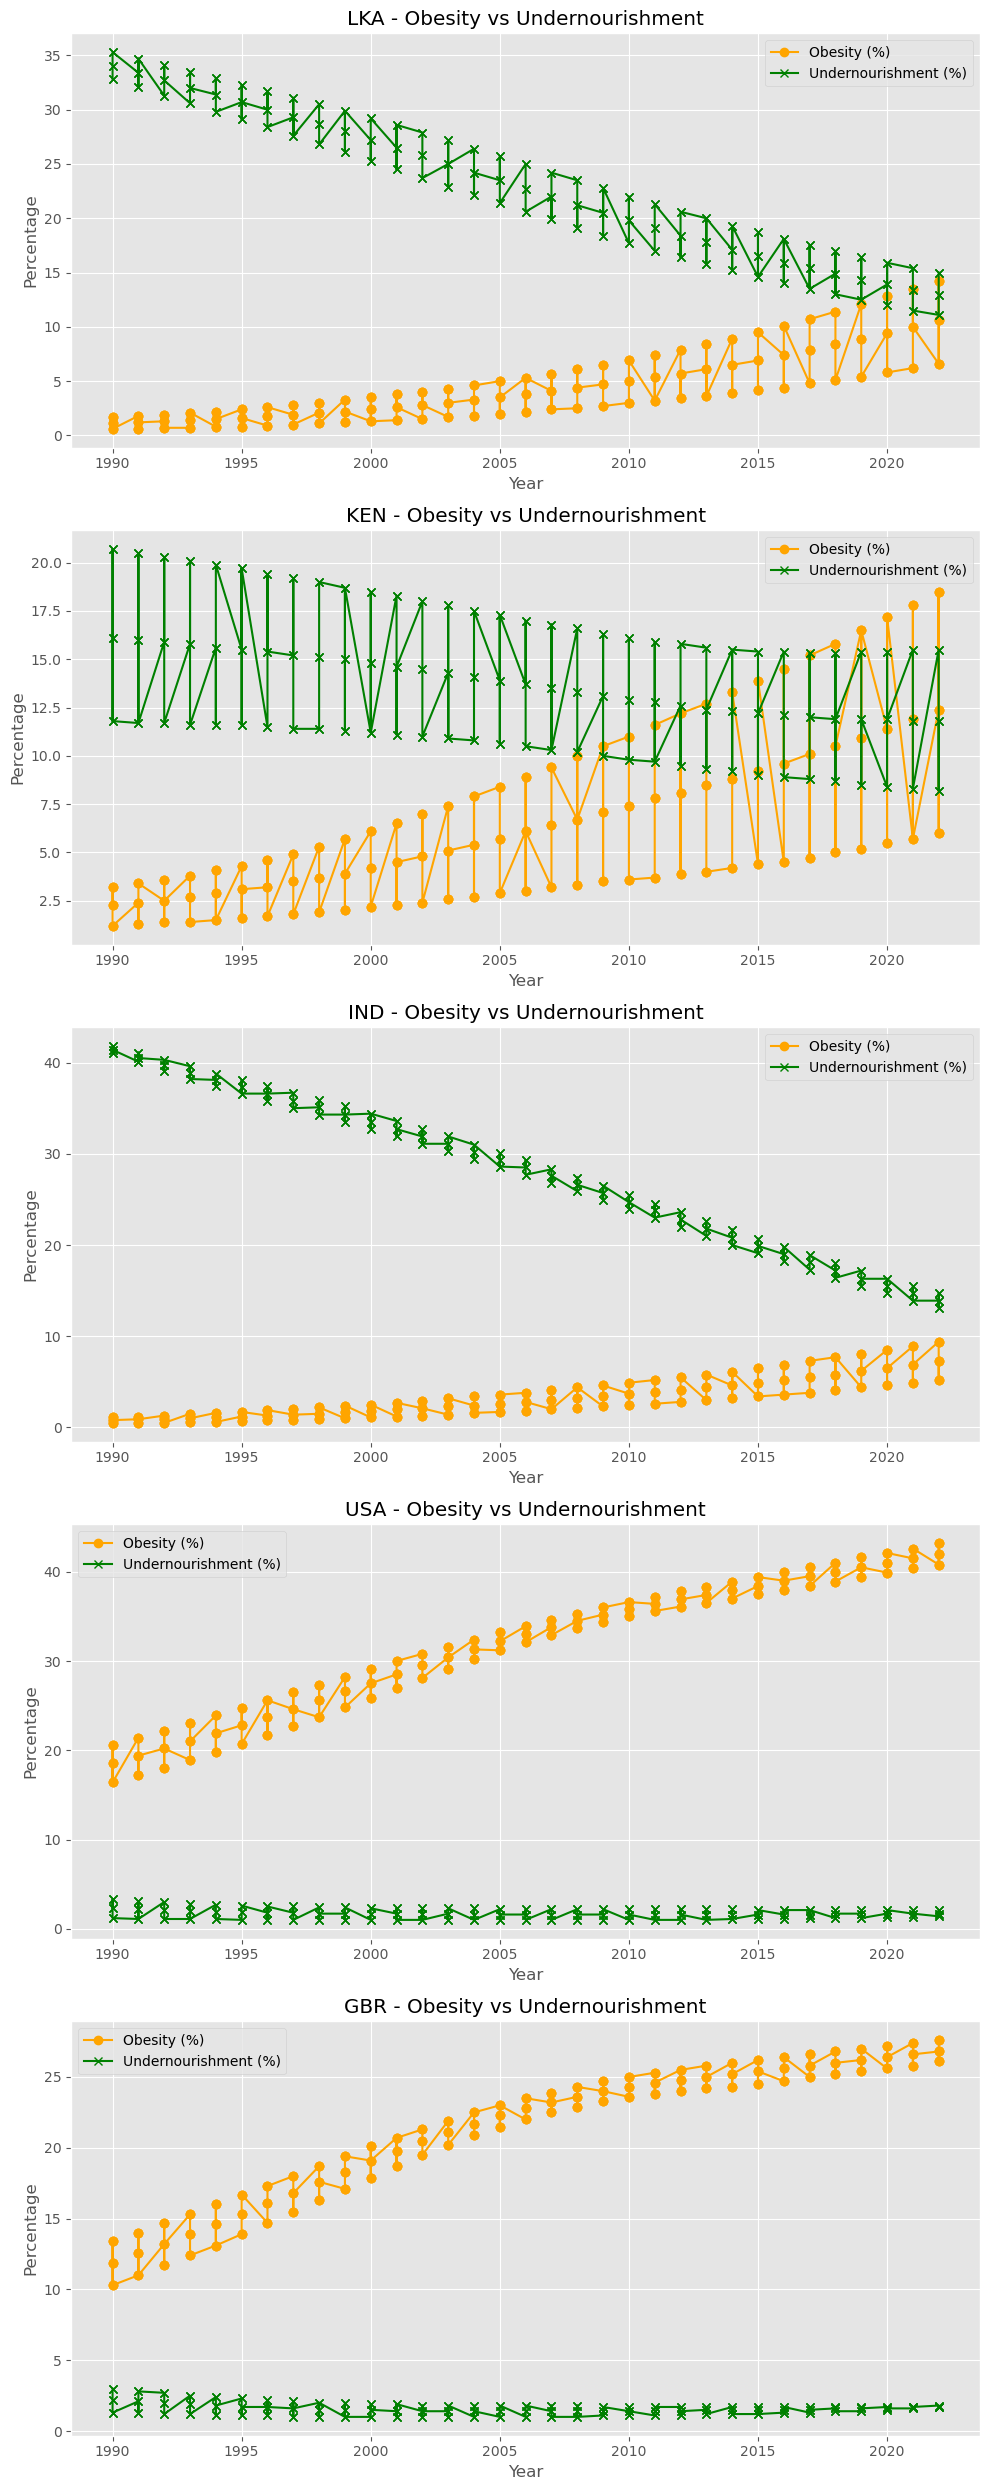

In [58]:
import matplotlib.pyplot as plt

# Try to use a built-in style if available
available_styles = plt.style.available
if 'seaborn-darkgrid' in available_styles:
    plt.style.use('seaborn-darkgrid')
elif 'ggplot' in available_styles:
    plt.style.use('ggplot')
else:
    print("Custom style not found. Using default Matplotlib style.")

# List of countries to plot
countries_to_plot = df_compare['SpatialDim'].unique()

# Create subplots
fig, axes = plt.subplots(len(countries_to_plot), 1, figsize=(10, 5 * len(countries_to_plot)))

# Loop through countries
for i, country in enumerate(countries_to_plot):
    country_df = df_compare[df_compare['SpatialDim'] == country].sort_values('TimeDim')

    axes[i].plot(country_df['TimeDim'], country_df['Obesity'], marker='o', label='Obesity (%)', color='orange')
    axes[i].plot(country_df['TimeDim'], country_df['Undernourishment'], marker='x', label='Undernourishment (%)', color='green')
    
    axes[i].set_title(f'{country} - Obesity vs Undernourishment')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Percentage')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [59]:
# Save comparison dataframe to CSV
df_compare.to_csv("nutrition_paradox_comparison.csv", index=False)

print("Data exported as 'nutrition_paradox_comparison.csv'")


Data exported as 'nutrition_paradox_comparison.csv'


2025-06-18 16:48:32.065 
  command:

    streamlit run C:\Users\Jdeep\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-18 16:48:32.067 No runtime found, using MemoryCacheStorageManager
2025-06-18 16:48:32.070 No runtime found, using MemoryCacheStorageManager


DeltaGenerator()

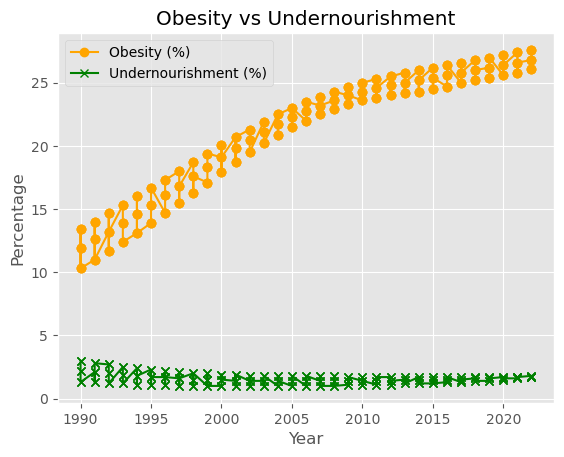

In [60]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.set_page_config(page_title="Nutrition Paradox Dashboard", layout="wide")

st.title("🥗 Nutrition Paradox: Obesity vs Undernourishment")

# Load data
@st.cache_data
def load_data():
    return pd.read_csv("nutrition_paradox_comparison.csv")

df = load_data()

# Sidebar filter
countries = sorted(df['SpatialDim'].unique())
selected_country = st.sidebar.selectbox("Select a Country", countries)

# Filter data
country_df = df[df['SpatialDim'] == selected_country].sort_values("TimeDim")

# Line chart
st.subheader(f"{selected_country} - Trend Over Years")
fig, ax = plt.subplots()
ax.plot(country_df["TimeDim"], country_df["Obesity"], label="Obesity (%)", marker='o', color='orange')
ax.plot(country_df["TimeDim"], country_df["Undernourishment"], label="Undernourishment (%)", marker='x', color='green')
ax.set_xlabel("Year")
ax.set_ylabel("Percentage")
ax.set_title("Obesity vs Undernourishment")
ax.legend()
ax.grid(True)
st.pyplot(fig)

# Show table
st.dataframe(country_df)

